# CSIT456 Lab 7: Dimensionality Reduction
## Due date: May 1st, 2020

## Name:

In [1]:
# imports and setup 

import numpy as np

import pandas as pd



from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import seaborn as sns

## Analyze US Arrests dataset

In this lab, you are going to analyze the US Arrests dataset.

This dataset describes 1973 violent crime rates by US State. The crimes considered are assault, murder, and rape. Also included is the percent of the population living in urban areas.

The dataset is available as *USarrests.csv*. The dataset has 50 observations (corresponding to each state) on 4 features: 
1. Murder: Murder arrests (per 100,000 residents)
2. Assault: Assault arrests (per 100,000 residents)
3. UrbanPop: Percent urban population
4. Rape: Rape arrests (per 100,000 residents)

You can read more about the dataset [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html). 

There are 4 features in this dataset and it is difficult to visualize the results. Here, we'll use PCA to do this first and then apply clustering tools to understand how violent crimes differ between states. 

(50, 4)
            Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6
            Murder   Assault  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.563579
Assault   0.801873  1.000000  0.258872  0.665241
UrbanPop  0.069573  0.258872  1.000000  0.411341
Rape      0.563579  0.665241  0.411341  1.000000


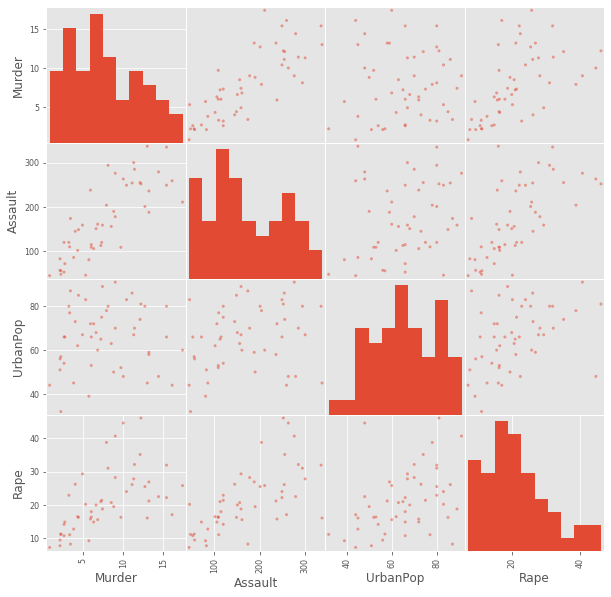

In [2]:
crime = pd.read_csv('USArrests.csv', index_col=0)

print(crime.shape)
print(crime.head())

# correlations and scatter plot matrix
print(crime.corr())
pd.plotting.scatter_matrix(crime, figsize=(10, 10), diagonal='hist'); 

#### Scale the dataset
Scale the dataset using the *scale* function of the sklearn.preprocessing library. 

In [3]:
# scale the dataset
X = scale(crime)

## Question 1 [10 points]: Principal Component Analysis (PCA)
Create a PCA model **pca_model** and calculate the principal components of the dataset **X** and transform it to the new one named **X_PCA**. 

In [4]:
pca_model = PCA()
X_PCA = pca_model.fit_transform(X)
X_PCA.shape

(50, 4)

Plot a scatterplot of PC1 and PC2. Using the matplotlib function *annotate*, use the state names as markers (instead of dots).

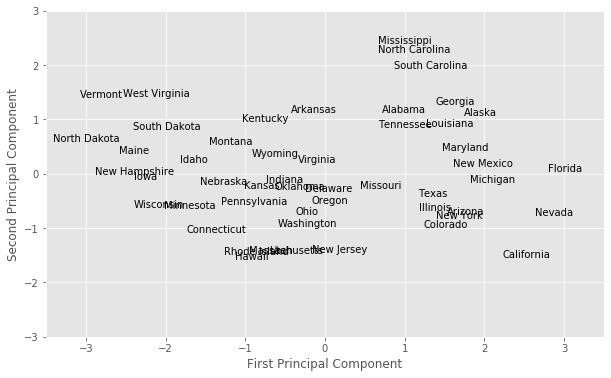

In [5]:
fig,ax1 = plt.subplots()

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3,3)

# Plot Principal Components 1 and 2
for i,name in enumerate(crime.index):
    ax1.annotate(name, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=10)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

## Question 2 [20 points]: Number of principal components
1. Get the variance ratio of the four principal components in **pca_model** and store them in the list **var_ratio**
2. Print **var_ratio**

In [6]:
var_ratio = pca_model.explained_variance_ratio_
print (var_ratio)

[0.62006039 0.24744129 0.0891408  0.04335752]


## Question 3 [20 points]: visualizing a k-means clustering
1. Using k-means, cluster the states into $k=4$ clusters. 
2. Print out the states name of each cluster

In [7]:
k_means_model= KMeans(n_clusters=4, n_init=100)
k_means_model.fit(X_PCA)
y_pred = k_means_model.predict(X_PCA)
y_pred

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 2,
       3, 0, 2, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 3, 1], dtype=int32)

Use the principal components to plot the clusters. Again label each point using the state name and this time color the states according to cluster.

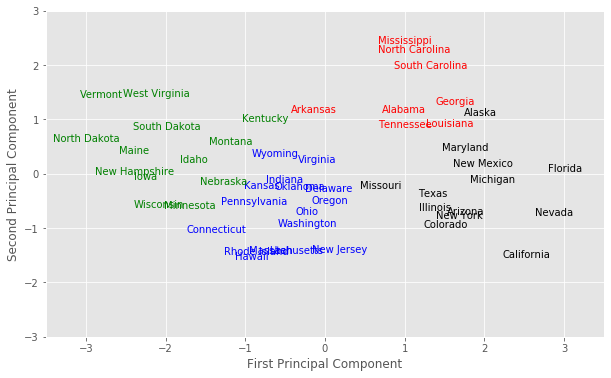

In [8]:
fig,ax1 = plt.subplots()

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3,3)

cs = ['red','blue','black','green']

# Plot Principal Components 1 and 2
for i,name in enumerate(crime.index):
    ax1.annotate(name, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=10,color=cs[y_pred[i]],)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

In [9]:
print (ax1.set_xlim)

<bound method _AxesBase.set_xlim of <matplotlib.axes._subplots.AxesSubplot object at 0x1a1f15e790>>
